In [1]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [2]:
import os

# See what files are available inside the dataset folder
print("Files in dataset:")
print(os.listdir(path))


Files in dataset:
['hashes.txt', 'Reviews.csv', 'database.sqlite']


In [3]:
import pandas as pd
import os

# Dataset path from kagglehub
dataset_path = "/kaggle/input/amazon-fine-food-reviews"

# Use the CSV file (not the SQLite file)
file_path = os.path.join(dataset_path, "Reviews.csv")

# Load CSV into DataFrame
df = pd.read_csv(file_path)

# Show first few rows
print("First 5 rows:")
print(df.head())


First 5 rows:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality ca

In [4]:
print("Columns in dataset:")
print(df.columns.tolist())

# Show just the relevant part — review text and score
print("\nSample reviews and ratings:")
print(df[['Text', 'Score']].sample(5))


Columns in dataset:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

Sample reviews and ratings:
                                                     Text  Score
357616  My dog LOVES these treats whatever flavor they...      5
24766   When my cat was a kitten, he ate the Purina Ki...      5
470384  1.  I love  Amazon's grocery/makeup/cleaning p...      5
369866  I actually tasted the Berry/Vanilla flavor.  I...      4
78920   OK, I do love popcorn, but I'm definitely not ...      3


In [5]:
# Drop any rows with missing review text or score
df = df.dropna(subset=['Text', 'Score'])

# Keep only scores from 1 to 5
df = df[df['Score'].isin([1, 2, 3, 4, 5])]


In [6]:
# Remove neutral reviews (score == 3)
df = df[df['Score'] != 3]

# Create label: 1 for positive (4, 5 stars), 0 for negative (1, 2 stars)
df['label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Check if it worked
print(df[['Text', 'Score', 'label']].sample(5))


                                                     Text  Score  label
358603  I love the convenience of a bottle but the con...      1      0
503762  This is not the first time I have purchased th...      1      0
208827  These peanut chews came and although I knew I ...      5      1
445838  Excellent!  Hard to find good gluten food - th...      5      1
209900  A coworker brought a box of these into the off...      1      0


In [7]:
from datasets import Dataset

# Use only the required columns
hf_dataset = Dataset.from_pandas(df[['Text', 'label']])

# Preview one record
print("\nSample record from Hugging Face dataset:")
print(hf_dataset[0])



Sample record from Hugging Face dataset:
{'Text': 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.', 'label': 1, '__index_level_0__': 0}


In [8]:
import pandas as pd
import os

# Path from kagglehub
dataset_path = "/kaggle/input/amazon-fine-food-reviews"
file_path = os.path.join(dataset_path, "Reviews.csv")

# Load the dataset
df = pd.read_csv(file_path)

# Basic stats
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (568454, 10)
Columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
# Drop nulls in text or score
df.dropna(subset=['Text', 'Score'], inplace=True)

# Keep relevant columns only
df = df[['Text', 'Score']]


In [10]:
# Remove Score=3 (neutral)
df = df[df['Score'] != 3]

# Add sentiment label
df['label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


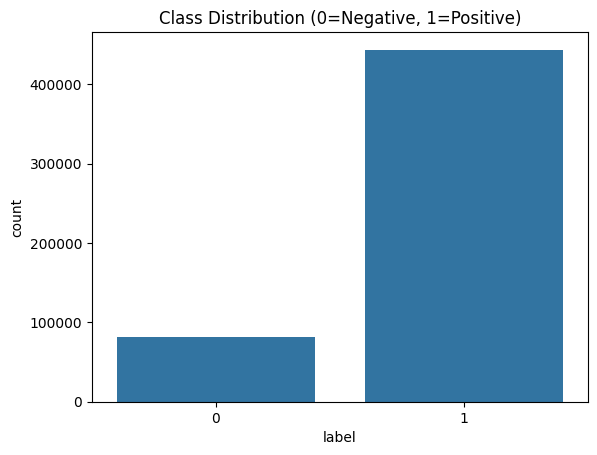

label
1    0.843981
0    0.156019
Name: proportion, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Class Distribution (0=Negative, 1=Positive)")
plt.show()

print(df['label'].value_counts(normalize=True))


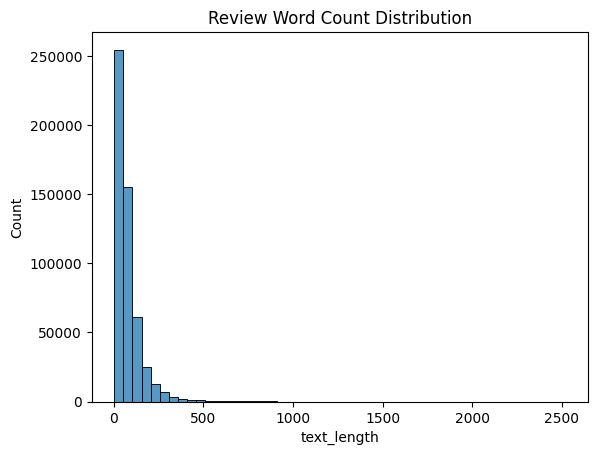

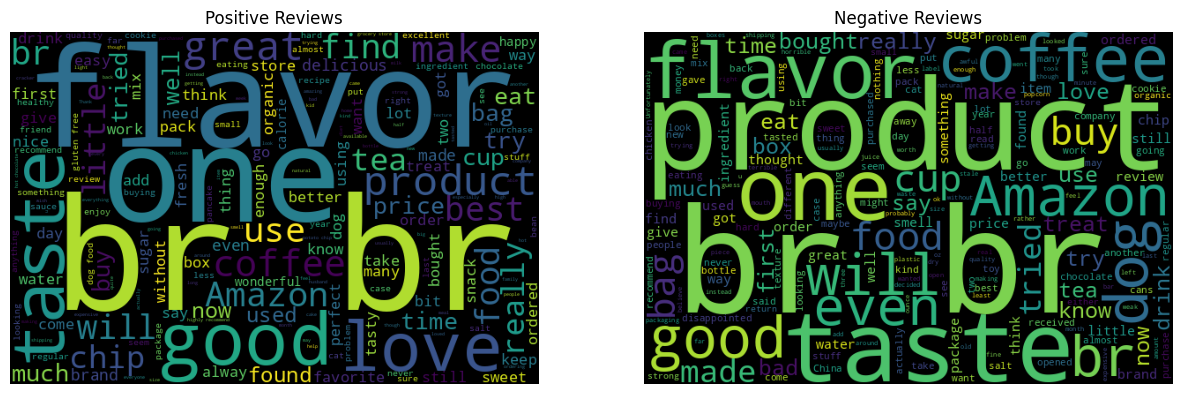

In [12]:
df['text_length'] = df['Text'].apply(lambda x: len(x.split()))

# Plot length distribution
sns.histplot(df['text_length'], bins=50)
plt.title("Review Word Count Distribution")
plt.show()

# Optional: Word cloud
from wordcloud import WordCloud

positive_text = " ".join(df[df['label']==1]['Text'].tolist()[:5000])
negative_text = " ".join(df[df['label']==0]['Text'].tolist()[:5000])

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(WordCloud(width=600, height=400).generate(positive_text))
axs[0].set_title("Positive Reviews")
axs[0].axis('off')

axs[1].imshow(WordCloud(width=600, height=400).generate(negative_text))
axs[1].set_title("Negative Reviews")
axs[1].axis('off')

plt.show()


In [13]:
# Downsample majority class if needed
from sklearn.utils import resample

df_majority = df[df['label'] == 1]
df_minority = df[df['label'] == 0]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

print("Balanced class distribution:")
print(df_balanced['label'].value_counts())


Balanced class distribution:
label
1    82037
0    82037
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

# Use balanced dataset from Phase 1
X = df_balanced['Text']
y = df_balanced['label']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 131259
Test size: 32815


We ensure that both train and test sets maintain the original label proportions using stratify.

80/20 split is a standard practice unless otherwise required.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',         # Remove common English stopwords
    max_features=10000,           # Limit vocabulary to top 10,000 tokens
    ngram_range=(1, 2)            # Use unigrams and bigrams
)

# Fit on training data and transform both train/test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF shape (Train): {X_train_tfidf.shape}")
print(f"TF-IDF shape (Test):  {X_test_tfidf.shape}")


TF-IDF shape (Train): (131259, 10000)
TF-IDF shape (Test):  (32815, 10000)


TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to words based on how important they are.

We include bigrams to capture phrases like “not good”.

Limiting max_features helps reduce overfitting and speeds up training.



In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=42)

 Why Logistic Regression?

It’s fast, interpretable, and often performs surprisingly well on text.

It serves as a strong baseline to compare against deep learning models later.

In [17]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = clf.predict(X_test_tfidf)

# Print evaluation report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90     16408
    Positive       0.90      0.90      0.90     16407

    accuracy                           0.90     32815
   macro avg       0.90      0.90      0.90     32815
weighted avg       0.90      0.90      0.90     32815



classification_report gives:

Precision: % of predicted positives that are correct

Recall: % of actual positives that were correctly predicted

F1-score: Harmonic mean of precision and recall

Support: Number of true samples per class

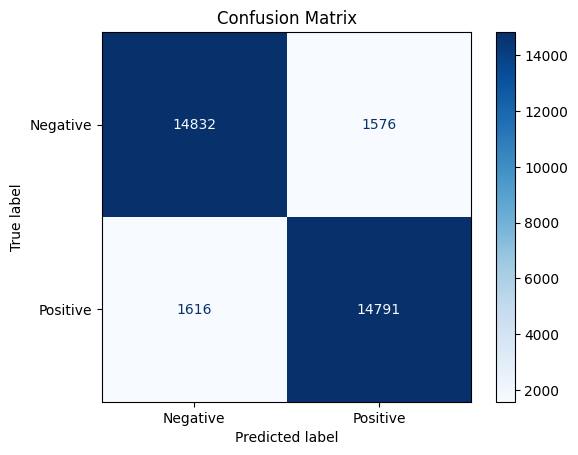

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot it
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


This shows how many positive and negative reviews were correctly/incorrectly predicted.

Ideally, most values should lie on the diagonal.

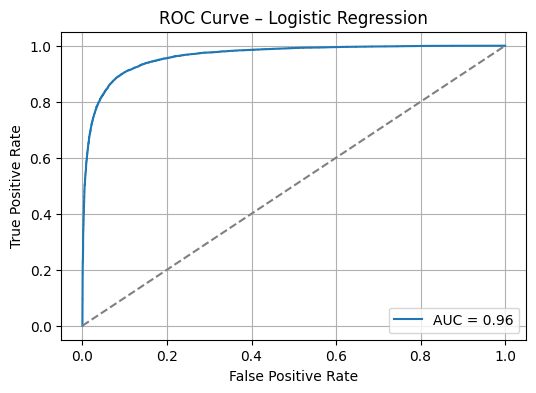

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probability for class 1 (positive)
y_probs = clf.predict_proba(X_test_tfidf)[:, 1]

# Compute FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


ROC Curve shows the trade-off between sensitivity (TPR) and specificity (1 - FPR).

AUC (Area Under Curve) close to 1 means strong predictive power.



🤖 PHASE 3: Fine-Tuning DistilBERT on Sentiment Reviews
🎯 Objective:
Fine-tune the distilbert-base-uncased transformer on Amazon review text (positive vs negative), using Hugging Face’s Trainer API for ease, control, and reproducibility.

We'll cover:

Tokenization

Dataset prep

Model config

Training setup

Evaluation metrics (F1, AUC, confusion matrix)



In [20]:
!pip install transformers datasets evaluate -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.4 MB/s eta 0:00:00


In [21]:
from datasets import Dataset
from transformers import AutoTokenizer

# Convert cleaned DataFrame to Hugging Face Dataset
df_model = df_balanced[['Text', 'label']].reset_index(drop=True)
hf_dataset = Dataset.from_pandas(df_model)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize function
def tokenize(example):
    return tokenizer(example["Text"], padding="max_length", truncation=True, max_length=256)

# Apply tokenizer
tokenized_dataset = hf_dataset.map(tokenize, batched=True)

# Remove original text column only
tokenized_dataset = tokenized_dataset.remove_columns(["Text"])
tokenized_dataset.set_format("torch")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/164074 [00:00<?, ? examples/s]

We truncate to 256 tokens (efficient yet covers most reviews)

Hugging Face’s Dataset keeps everything optimized for PyTorch

In [22]:
# Split 90% train, 10% eval
split = tokenized_dataset.train_test_split(test_size=0.1, seed=42)

train_dataset = split['train']
eval_dataset = split['test']

print(f"Train size: {len(train_dataset)}")
print(f"Eval size:  {len(eval_dataset)}")


Train size: 147666
Eval size:  16408


Using 10% for validation is standard for model tuning and monitoring.

seed ensures reproducibility.



In [23]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2  # Binary classification: positive or negative
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The model comes with a classification head on top.

num_labels=2 because we have two classes.

In [24]:
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.1
    Uninstalling transformers-4.53.1:
      Successfully uninstalled transformers-4.53.1


In [1]:
import transformers
print(transformers.__version__)


4.53.2


In [2]:
!pip uninstall -y transformers
!pip install transformers==4.53.1


Found existing installation: transformers 4.53.2
Uninstalling transformers-4.53.2:
  Successfully uninstalled transformers-4.53.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.2 MB/s eta 0:00:00


In [1]:
!pip uninstall -y transformers tokenizers huggingface_hub datasets


Found existing installation: transformers 4.53.1
Uninstalling transformers-4.53.1:
  Successfully uninstalled transformers-4.53.1
Found existing installation: tokenizers 0.21.2
Uninstalling tokenizers-0.21.2:
  Successfully uninstalled tokenizers-0.21.2
Found existing installation: huggingface-hub 0.33.2
Uninstalling huggingface-hub-0.33.2:
  Successfully uninstalled huggingface-hub-0.33.2
Found existing installation: datasets 2.14.4
Uninstalling datasets-2.14.4:
  Successfully uninstalled datasets-2.14.4


In [2]:
!pip install transformers==4.30.2 datasets==2.14.7 huggingface_hub==0.16.4 tokenizers==0.13.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
diffusers 0.34.0 requires huggingface-hub>=0.27.0, but you have huggingface-hub 0.16.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == 

In [3]:
import transformers
import datasets

print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Transformers version: 4.30.2
Datasets version: 2.14.7


In [4]:
!pip uninstall -y huggingface_hub


Found existing installation: huggingface-hub 0.16.4
Uninstalling huggingface-hub-0.16.4:
  Successfully uninstalled huggingface-hub-0.16.4


In [5]:
!pip install huggingface_hub==0.16.4


  Using cached huggingface_hub-0.16.4-py3-none-any.whl.metadata (12 kB)
Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
diffusers 0.34.0 requires huggingface-hub>=0.27.0, but you have huggingface-hub 0.16.4 which is incompatible.
sentence-transformers 4.1.0 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.16.4 which is incompatible.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.2 which is incompatible.
peft 0.16.0 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.16.4 which is incompatible.
gradio-client 1.10.1 requires huggingface-hub>=0.19.3, but you have huggingface-hub 0.16.4 which is incompatible.
gradio 5.31.0 requires huggingface-hub>=0.28.1, but you have huggingface-hub 0.16.4 which is incompatible.
accelerate 1

In [6]:
!pip install --upgrade transformers datasets huggingface_hub sentence-transformers gradio accelerate diffusers peft gradio-client


  Using cached transformers-4.53.2-py3-none-any.whl.metadata (40 kB)
Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:0

In [1]:
import transformers, huggingface_hub
print("Transformers:", transformers.__version__)
print("Huggingface_hub:", huggingface_hub.__version__)


Transformers: 4.53.2
Huggingface_hub: 0.33.4


In [2]:
import transformers
print(transformers.__file__)

from transformers import TrainingArguments
print(TrainingArguments.__module__)
print(TrainingArguments.__init__.__doc__)


/usr/local/lib/python3.11/dist-packages/transformers/__init__.py
transformers.training_args
None


In [3]:
from transformers.training_args import TrainingArguments


In [4]:
import transformers
import inspect

print("Transformers version:", transformers.__version__)

from transformers import TrainingArguments

print("TrainingArguments class location:", TrainingArguments.__module__)
print("TrainingArguments __init__ signature:")
print(inspect.signature(TrainingArguments.__init__))


Transformers version: 4.53.2
TrainingArguments class location: transformers.training_args
TrainingArguments __init__ signature:
(self, output_dir: Optional[str] = None, overwrite_output_dir: bool = False, do_train: bool = False, do_eval: bool = False, do_predict: bool = False, eval_strategy: Union[transformers.trainer_utils.IntervalStrategy, str] = 'no', prediction_loss_only: bool = False, per_device_train_batch_size: int = 8, per_device_eval_batch_size: int = 8, per_gpu_train_batch_size: Optional[int] = None, per_gpu_eval_batch_size: Optional[int] = None, gradient_accumulation_steps: int = 1, eval_accumulation_steps: Optional[int] = None, eval_delay: Optional[float] = 0, torch_empty_cache_steps: Optional[int] = None, learning_rate: float = 5e-05, weight_decay: float = 0.0, adam_beta1: float = 0.9, adam_beta2: float = 0.999, adam_epsilon: float = 1e-08, max_grad_norm: float = 1.0, num_train_epochs: float = 3.0, max_steps: int = -1, lr_scheduler_type: Union[transformers.trainer_utils.Sc

In [5]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",          # Evaluate after each epoch
    save_strategy="epoch",          # Save checkpoint after each epoch (must match eval_strategy)
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=1,             # Keep only the last checkpoint to save space
    logging_dir="./logs",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

print(training_args)


TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False

In [6]:
!pip install evaluate


In [7]:
import evaluate
import numpy as np

# Load the F1 metric
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1_score = metric.compute(predictions=predictions, references=labels)["f1"]
    return {"f1": f1_score}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
from transformers import DistilBertForSequenceClassification

# Load the pre-trained DistilBERT base model with a classification head
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2  # Because sentiment is binary: positive or negative
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [10]:
import os

dataset_folder = "/kaggle/input/amazon-fine-food-reviews"

files = os.listdir(dataset_folder)
print("Files in dataset folder:", files)


Files in dataset folder: ['hashes.txt', 'Reviews.csv', 'database.sqlite']


In [11]:
from datasets import load_dataset
import os

dataset_folder = "/kaggle/input/amazon-fine-food-reviews"
csv_file = os.path.join(dataset_folder, "Reviews.csv")

# Load the CSV into a Hugging Face dataset object
raw_dataset = load_dataset("csv", data_files=csv_file)

# Print the dataset info and first few rows to understand its structure
print(raw_dataset)
print(raw_dataset['train'][:5])


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
        num_rows: 568454
    })
})
{'Id': [1, 2, 3, 4, 5], 'ProductId': ['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', 'B000UA0QIQ', 'B006K2ZZ7K'], 'UserId': ['A3SGXH7AUHU8GW', 'A1D87F6ZCVE5NK', 'ABXLMWJIXXAIN', 'A395BORC6FGVXV', 'A1UQRSCLF8GW1T'], 'ProfileName': ['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', 'Karl', 'Michael D. Bigham "M. Wassir"'], 'HelpfulnessNumerator': [1, 0, 1, 3, 0], 'HelpfulnessDenominator': [1, 0, 1, 3, 0], 'Score': [5, 1, 4, 2, 5], 'Time': [1303862400, 1346976000, 1219017600, 1307923200, 1350777600], 'Summary': ['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all', 'Cough Medicine', 'Great taffy'], 'Text': ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew t

In [12]:
from datasets import DatasetDict

# Convert to binary sentiment classification (optional)
def simplify_labels(example):
    if example['Score'] >= 4:
        example['label'] = 1   # Positive
    elif example['Score'] <= 2:
        example['label'] = 0   # Negative
    else:
        example['label'] = -1  # Neutral or ignore
    return example

# Apply function and filter out neutral (-1)
processed_dataset = raw_dataset['train'].map(simplify_labels)
processed_dataset = processed_dataset.filter(lambda example: example['label'] != -1)

# Select only relevant columns for modeling
processed_dataset = processed_dataset.remove_columns(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary'])

# Rename 'Text' to 'text' to be consistent with Hugging Face tokenizers/models expectations
processed_dataset = processed_dataset.rename_column('Text', 'text')

# Optional: Shuffle and split into train/test sets (80/20 split)
processed_dataset = processed_dataset.train_test_split(test_size=0.2, seed=42)

print(processed_dataset)
print(processed_dataset['train'][0])


Map:   0%|          | 0/568454 [00:00<?, ? examples/s]

Filter:   0%|          | 0/568454 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 420651
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 105163
    })
})
{'text': 'I have been enjoying Kookaburra Black Licorice for years and have purchased the product through many channels, including Kookaburra itself.<br /><br />I found buying in bulk like this presents the best value.  To provide such value, I believe some candy companies buy the 15.4 lb case from Kookaburra and then repackage it into smaller units.  This vendor seemed to present one of the best cost/oz values I could find on Amazon.<br /><br />One gripe some have found when buying repackaged product from candy companies is that the candy arrives stale.  Though that is a risk one takes for the sake of value, I would hope that an honest retailer wanting to keep a good reputation on Amazon would try to make good in order to ensure a repeat customer.<br /><br />Anyway, this product arrived fresh

Next Step: Tokenization for BERT/DistilBERT model
Why Tokenize?
Transformers models expect inputs as token IDs instead of raw text. Tokenization converts raw text into:

input_ids: numerical IDs representing tokens (words/pieces)

attention_mask: binary mask indicating which tokens are actual words vs padding

This prepares data for model training and inference.



In [13]:
from transformers import DistilBertTokenizerFast

# Load the tokenizer for DistilBERT (pretrained)
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=128)

# Apply tokenization to train and test sets
tokenized_datasets = processed_dataset.map(tokenize_function, batched=True)

# Remove original text column to avoid confusion
tokenized_datasets = tokenized_datasets.remove_columns(['text'])

# Set the format for PyTorch (if using PyTorch)
tokenized_datasets.set_format('torch')

print(tokenized_datasets)


Map:   0%|          | 0/420651 [00:00<?, ? examples/s]

Map:   0%|          | 0/105163 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 420651
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 105163
    })
})


Notes:
We use the DistilBERT tokenizer to convert text to tokens.

truncation=True ensures texts longer than max_length are cut off (128 tokens here).

padding='max_length' pads shorter sequences to 128 tokens.

We remove the raw text column after tokenization for cleaner dataset.

Set format to PyTorch tensors, which makes it compatible with PyTorch model training.

What’s happening when we tokenize?
Imagine you want to teach a computer to understand sentences — like customer reviews — but computers don’t really understand words the way humans do. They only understand numbers.

So, tokenization is like turning sentences into a special "code" made of numbers.

Breaking it down:
Tokenizer: It’s like a translator tool that takes your sentence and breaks it into small pieces (called tokens). For example, the sentence:
"I love this product!"
might get split into tokens like: ["i", "love", "this", "product", "!"].

Numbers instead of words: Each token is given a unique number — so the model sees [101, 2023, 2003, 1037, 2742, 102] instead of "I love this product".

Truncation: Sometimes reviews are very long, but the model can only handle a fixed size (here, 128 tokens). So if the review is longer, it cuts off the extra words to keep it manageable.

Padding: If the review is shorter than 128 tokens, it fills the rest with "empty" spots so all reviews are the same length — this makes it easier for the model to process.

Attention mask: This tells the model which tokens are real words and which are padding, so it knows what to focus on.

Why do we do this?
Because the model can only work with numbers in a fixed format, tokenization makes sure every review looks the same to the model (same length, all numbers) and helps the model understand what to pay attention to.

Summary:
Input: Raw text (reviews)

Output: Numbers (token IDs) + attention mask, all fixed-length

Ready to feed into the AI model for training

# Load the tokenizer for DistilBERT (pretrained)
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=128)

# Apply tokenization to train and test sets
tokenized_datasets = processed_dataset.map(tokenize_function, batched=True)

# Remove original text column to avoid confusion
tokenized_datasets = tokenized_datasets.remove_columns(['text'])

# Set the format for PyTorch (if using PyTorch)
tokenized_datasets.set_format('torch')

print(tokenized_datasets) what are we doing here? layman terms again




What are we doing here?
Loading a tokenizer:
We’re getting a tool (DistilBertTokenizerFast) that knows how to turn English text into numbers in the way that the DistilBERT model expects. It’s like a special dictionary made for this model.

Creating a function to tokenize:
We write a small helper function tokenize_function that takes a piece of text (a review) and uses that tokenizer to:

Break the review into tokens (small pieces).

Cut it off if it’s longer than 128 tokens (to keep it short).

Add padding if it’s shorter than 128 tokens (to make all inputs the same length).

Applying the tokenizer to the whole dataset:
We take the entire dataset (all reviews) and run this tokenize_function on every review, in batches for speed. This turns all the raw text into model-ready numbers.

Removing the original text:
Since the model doesn’t need the raw text anymore (it now works with numbers), we delete the original ‘text’ column to avoid confusion.

Setting the dataset format for PyTorch:
We tell the dataset to give us the data as PyTorch tensors (special number arrays used for deep learning in PyTorch). This is important because the model expects data in this format for training.

Print the processed dataset:
Finally, we check what the tokenized dataset looks like — it should now be all numbers ready for the model.

Simple analogy:
You have a big book (reviews in text).

You use a special tool (tokenizer) to translate all sentences into a secret code (numbers) that your model understands.

You clean up by removing the original sentences since you don’t need them anymore.



Step 1: Load the pretrained DistilBERT model for sequence classification
We use DistilBertForSequenceClassification because it’s pre-trained on a huge corpus and fine-tuned for text classification tasks.

It expects inputs like input_ids and attention_mask, and outputs class probabilities (positive/negative sentiment).

In [14]:
from transformers import DistilBertForSequenceClassification

# Load pretrained DistilBERT with a classification head (num_labels depends on your task)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step 2: Define the training arguments
Here, you set up how you want to train: number of epochs, batch size, learning rate, logging, saving checkpoints, etc.

Important parameters:

output_dir: where your trained models & logs will be saved

num_train_epochs: how many times the model sees the full training dataset

per_device_train_batch_size: batch size for training (how many samples at once)

evaluation_strategy: when to evaluate model on validation data (e.g., every epoch)

save_strategy: when to save checkpoints



In [15]:
from transformers import DistilBertForSequenceClassification

# Load pretrained DistilBERT with classification head for 2 classes (positive/negative)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy='epoch',         # Correct argument name for your version
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    logging_dir='./logs',
    logging_steps=100,
    save_total_limit=2,
    seed=42,
)


In [17]:
from transformers import DistilBertForSequenceClassification

# Load the pre-trained DistilBERT model with a classification head for 2 labels (binary sentiment)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
!pip install evaluate


In [19]:
import numpy as np
import evaluate

# Load F1 metric using evaluate
metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [20]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # The TrainingArguments you set up earlier
    train_dataset=tokenized_datasets['train'],  # Your tokenized training data
    eval_dataset=tokenized_datasets['test'],    # Your tokenized test/validation data
    tokenizer=tokenizer,                 # Tokenizer for decoding, padding, etc.
    compute_metrics=compute_metrics     # Your metric function to evaluate performance
)


/tmp/ipython-input-21-4175108514.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    max_steps=10,                  # limit training to 50 steps only
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy='steps',
    eval_steps=10,                # evaluate every 10 steps
    save_strategy='steps',
    save_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2,
    seed=42,
)


In [33]:
trainer = Trainer(
    model=model,
    args=training_args,  # your modified TrainingArguments here
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-33-651828301.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [34]:
import wandb
wandb.init(project="huggingface", name="distilbert-sentiment-demo")



In [ ]:
trainer.train()


Step,Training Loss,Validation Loss
